In [1]:
#Importing Python Libraries
import cv2
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import to_categorical
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\ARUN\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ARUN\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ARUN\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ARUN\anaconda3\envs\python-cvcourse\l

In [2]:
#Set the File Destation and important datasets
Tumor="C:\\Users\\ARUN\\OneDrive\\Desktop\\ALL FOLDER\\PROJECT\\Brain_Tumor_Detection\\Img\\Yes"
No_Tumor="C:\\Users\\ARUN\\OneDrive\\Desktop\\ALL FOLDER\\PROJECT\\Brain_Tumor_Detection\\Img\\No"
label=[]
dataset=[]
input_size=128

In [3]:
#Collect all the tumor images files and append in dataset
Tumor_file_names = os.listdir(Tumor)
for i, image_name in enumerate(Tumor_file_names):
    image_path = os.path.join(Tumor,image_name)
    image=cv2.imread(image_path)
    image=Image.fromarray(image,'RGB')
    image=image.resize((input_size, input_size))
    dataset.append(np.array(image))
    label.append(0)

In [4]:
#Collect all the non tumor images files and append in dataset
No_Tumor_file_names = os.listdir(No_Tumor)
for i, image_name in enumerate(No_Tumor_file_names):
    image_path = os.path.join(No_Tumor,image_name)
    image=cv2.imread(image_path)
    image=Image.fromarray(image,'RGB')
    image=image.resize((input_size, input_size))
    dataset.append(np.array(image))
    label.append(1)

In [5]:
#Convert the dataset array to numpy array
dataset=np.array(dataset)
label=np.array(label)

In [11]:
#Split the iamges in TEST and TRAIN
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

In [13]:
#Reshapeing
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [15]:
#Normalization value under 0 to 1
x_train=x_train/255.0
x_test=x_test/255.5

In [16]:
#Model Creation
model=Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(128,128,3), kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train, epochs=20, batch_size=32, verbose=1, validation_data=(x_test, y_test), shuffle=False)

Train on 7200 samples, validate on 1800 samples
Epoch 1/20
7200/7200 [==============================] - 61s 9ms/step - loss: 0.5990 - acc: 0.6918 - val_loss: 0.4567 - val_acc: 0.7794
Epoch 2/20
7200/7200 [==============================] - 60s 8ms/step - loss: 0.4266 - acc: 0.8131 - val_loss: 0.3764 - val_acc: 0.8278
Epoch 3/20
7200/7200 [==============================] - 62s 9ms/step - loss: 0.3279 - acc: 0.8649 - val_loss: 0.2793 - val_acc: 0.8783
Epoch 4/20
7200/7200 [==============================] - 61s 8ms/step - loss: 0.2315 - acc: 0.9083 - val_loss: 0.2625 - val_acc: 0.8939
Epoch 5/20
7200/7200 [==============================] - 61s 8ms/step - loss: 0.1663 - acc: 0.9367 - val_loss: 0.2697 - val_acc: 0.9072
Epoch 6/20
7200/7200 [==============================] - 61s 8ms/step - loss: 0.1098 - acc: 0.9621 - val_loss: 0.2388 - val_acc: 0.9194
Epoch 7/20
7200/7200 [==============================] - 60s 8ms/step - loss: 0.0865 - acc: 0.9699 - val_loss: 0.1740 - val_acc: 0.9467
Epoch 8

In [20]:
model.evaluate(x_test,y_test)

1800/1800 [==============================] - 6s 3ms/step


[0.16778645416463, 0.9644444444444444]

In [36]:
#Check the history keys
history = model.history.history
for key in history.keys():
   print(key)

val_loss
val_acc
loss
acc


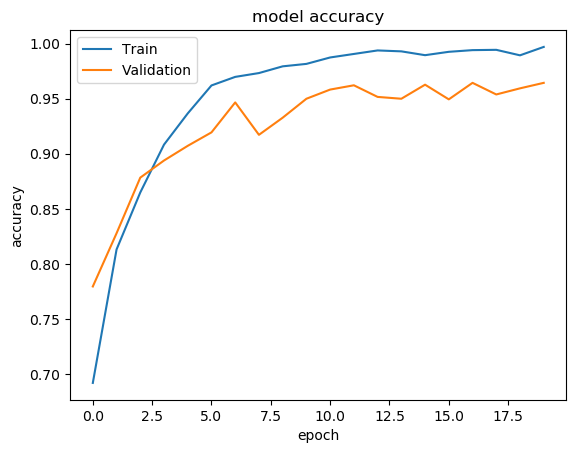

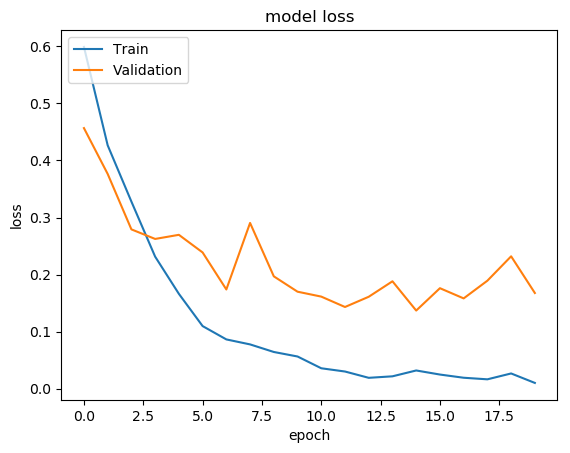

In [40]:
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(color='white')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
results = model.evaluate(x_test, y_test, batch_size=1)

testLoss = results[0]
testAccuracy = results[1]*100

print('Test loss : %.2f' % testLoss)
print('Test accuracy : %.2f' % testAccuracy, "%")

1800/1800 [==============================] - 9s 5ms/step
Test loss : 0.17
Test accuracy : 96.44 %


In [42]:
predicted_labels = model.predict(x_test)
 
predicted_labels = (predicted_labels > 0.5)

fmeasureScore = f1_score(y_test, predicted_labels,average='micro')
print('F-measure Score : %.2f' % fmeasureScore)

F-measure Score : 0.96


In [43]:
cm = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
y_true=y_test 
y_pred=predicted_labels

In [44]:
acc = accuracy_score(y_true, y_pred)*100
tn, fp, fn, tp = cm.ravel()
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {0:0.2f}%'.format(acc))
print('Precision: {0:0.2f}%'.format(precision))
print('Recall: {0:0.2f}%'.format(recall))
print('F1-score: {0:0.2f}'.format(2*precision*recall/(precision+recall)))

Accuracy: 96.44%
Precision: 94.60%
Recall: 98.57%
F1-score: 96.54


In [45]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    import itertools

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

In [46]:
 
from sklearn.metrics import confusion_matrix

# check for Sensitivity & Specificity
#predict_x=model.predict(x_test) 
#classes_x=np.argmax(predict_x,axis=1)

cm = confusion_matrix(y_test,predicted_labels)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Confusion Matrice : ')
print(cm)
print('-----------------------------')
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


Confusion Matrice : 
[[842  51]
 [ 13 894]]
-----------------------------
sensitivity: 0.9429
specificity: 0.9857


Confusion matrix, without normalization
[[842  51]
 [ 13 894]]


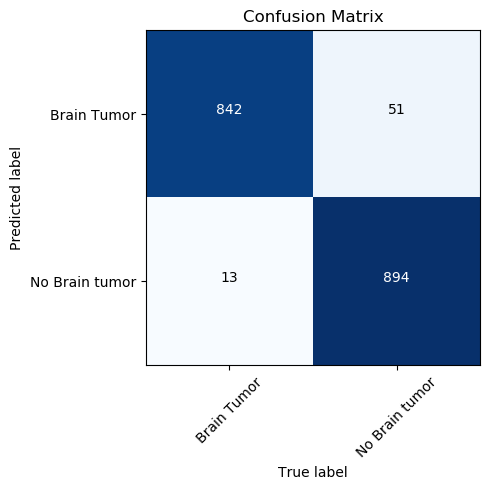

In [47]:
cm_plot_labels = ['Brain Tumor', 'No Brain tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
#categorical
y_pred = model.predict(x_test)

print(classification_report(y_test,predicted_labels))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       893
          1       0.95      0.99      0.97       907

avg / total       0.97      0.96      0.96      1800



In [49]:
from keras.models import load_model

model.save('BrainToumorDetectionFinal.h5')

Val is:  [[5.5661736e-10]]
Now Val is:  [[False]]
Model is Tumor


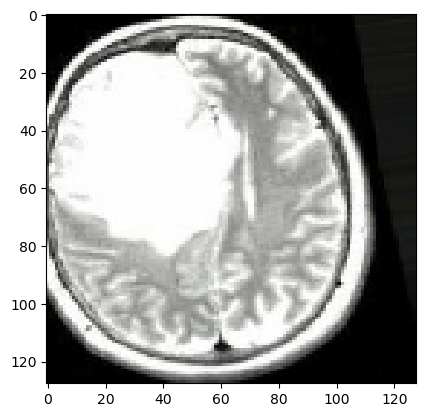

In [68]:
idx=random.randint(1, 1800)
plt.imshow(x_test[idx, :])
plt.show
y_pred=model.predict(x_test[idx, :].reshape(1,128,128,3))
print("Val is: ",y_pred)
y_pred=y_pred>0.5
print("Now Val is: ",y_pred)
if(y_pred == 0):
    pred='Tumor'
else:
    pred='Not toumer'
print(f"Model is {pred}")